In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv('valle.txt', skiprows=20, sep='\s+', header=None, names=["FECHA","PRECIP", "EVAP","TMAX", "TMIN"])
sns.set(rc={'figure.figsize':(12,8.27)})

In [4]:
df0.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN
0,20/01/1961,11,Nulo,21,10
1,21/01/1961,0,Nulo,23,12
2,22/01/1961,2,Nulo,23,11
3,23/01/1961,0,Nulo,22,8
4,24/01/1961,0,Nulo,24,6


In [5]:
df = pd.DataFrame(df0)

In [6]:
df.dtypes

FECHA     object
PRECIP    object
EVAP      object
TMAX      object
TMIN      object
dtype: object

In [7]:
df['PRECIP'] = df['PRECIP'].str.replace('Nulo','NaN').astype(np.float64)
df['EVAP'] = df['EVAP'].str.replace('Nulo','NaN').astype(np.float64)
df['TMAX'] = df['TMAX'].str.replace('Nulo','NaN').astype(np.float64)
df['TMIN'] = df['TMIN'].str.replace('Nulo','NaN').astype(np.float64)

In [8]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['FECHA'], 1), dayfirst=True)

In [9]:
df0.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN
0,20/01/1961,11.0,NaN,21.0,10.0
1,21/01/1961,0.0,NaN,23.0,12.0
2,22/01/1961,2.0,NaN,23.0,11.0
3,23/01/1961,0.0,NaN,22.0,8.0
4,24/01/1961,0.0,NaN,24.0,6.0


In [10]:
df.dtypes

FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

In [11]:
df.tail()

,FECHA,PRECIP,EVAP,TMAX,TMIN
7735,2014-08-27,0.0,5.1,27.0,13.5
7736,2014-08-28,0.0,6.7,26.5,14.0
7737,2014-08-29,0.0,4.6,26.5,15.0
7738,2014-08-30,9.0,1.9,23.5,14.5
7739,2014-08-31,17.0,2.6,20.0,14.5


In [12]:
df.dtypes

FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

In [13]:
df.mean()

PRECIP     2.628546
EVAP       4.525241
TMAX      25.246330
TMIN      11.504829
dtype: float64

In [14]:
df.std()

PRECIP    6.507803
EVAP      2.144271
TMAX      3.125465
TMIN      3.544148
dtype: float64

In [15]:
df.mean()

PRECIP     2.628546
EVAP       4.525241
TMAX      25.246330
TMIN      11.504829
dtype: float64

In [16]:
df.std()

PRECIP    6.507803
EVAP      2.144271
TMAX      3.125465
TMIN      3.544148
dtype: float64

In [17]:
df.median()

PRECIP     0.0
EVAP       4.1
TMAX      25.0
TMIN      12.0
dtype: float64

In [18]:
df.max()

FECHA     2014-08-31 00:00:00
PRECIP                     78
EVAP                     13.9
TMAX                     34.5
TMIN                       22
dtype: object

In [19]:
df.min()

FECHA     1961-01-20 00:00:00
PRECIP                      0
EVAP                      0.1
TMAX                       11
TMIN                        0
dtype: object

In [20]:
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,7735.000000,3950.000000,7725.000000,7703.000000
mean,2.628546,4.525241,25.246330,11.504829
std,6.507803,2.144271,3.125465,3.544148
min,0.000000,0.100000,11.000000,0.000000
25%,0.000000,2.900000,23.000000,9.500000
50%,0.000000,4.100000,25.000000,12.000000
75%,1.800000,5.900000,27.500000,14.000000
max,78.000000,13.900000,34.500000,22.000000


In [21]:
df.sum()

PRECIP     20331.8
EVAP       17874.7
TMAX      195027.9
TMIN       88621.7
dtype: float64

In [22]:
df['week_start'] = df['FECHA'] + pd.DateOffset(weeks=1)

In [23]:
df.shape

(7740, 6)

In [24]:
df.index

RangeIndex(start=0, stop=7740, step=1)

In [25]:
df.count()

FECHA         7740
PRECIP        7735
EVAP          3950
TMAX          7725
TMIN          7703
week_start    7740
dtype: int64

In [26]:
df.corr()

,PRECIP,EVAP,TMAX,TMIN
PRECIP,1.000000,-0.192761,-0.208815,0.269042
EVAP,-0.192761,1.000000,0.667317,0.094877
TMAX,-0.208815,0.667317,1.000000,-0.079000
TMIN,0.269042,0.094877,-0.079000,1.000000


In [27]:
df.PRECIP.max()

78.0

In [28]:
df['DIA'] = df['FECHA'].dt.day
df.head()

df['MES'] = df['FECHA'].dt.month
df.head()

df['AÑO'] = df['FECHA'].dt.year
df.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN,week_start,DIA,MES,AÑO
0,1961-01-20,11.0,NaN,21.0,10.0,1961-01-27,20,1,1961
1,1961-01-21,0.0,NaN,23.0,12.0,1961-01-28,21,1,1961
2,1961-01-22,2.0,NaN,23.0,11.0,1961-01-29,22,1,1961
3,1961-01-23,0.0,NaN,22.0,8.0,1961-01-30,23,1,1961
4,1961-01-24,0.0,NaN,24.0,6.0,1961-01-31,24,1,1961


In [29]:

df_ENE=df[df.MES==1]
df_FEB=df[df.MES==2]
df_MAR=df[df.MES==3]
df_ABR=df[df.MES==4]
df_MAY=df[df.MES==5]
df_JUN=df[df.MES==6]
df_JUL=df[df.MES==7]
df_AGO=df[df.MES==8]
df_SEP=df[df.MES==9]
df_OCT=df[df.MES==10]
df_NOV=df[df.MES==11]
df_DIC=df[df.MES==12]

In [30]:
PRECIP_ENE=df_ENE.PRECIP.sum()
print("ENE = ",PRECIP_ENE)

PRECIP_FEB=df_FEB.PRECIP.sum()
print("FEB = ",PRECIP_FEB)

PRECIP_MAR=df_MAR.PRECIP.sum()
print("MAR = ",PRECIP_MAR)

PRECIP_ABR=df_ABR.PRECIP.sum()
print("ABR = ",PRECIP_ABR)

PRECIP_MAY=df_MAY.PRECIP.sum()
print("MAY = ",PRECIP_MAY)

PRECIP_JUN=df_JUN.PRECIP.sum()
print("JUN = ",PRECIP_JUN)

PRECIP_JUL=df_JUL.PRECIP.sum()
print("JUL = ",PRECIP_JUL)

PRECIP_AGO=df_AGO.PRECIP.sum()
print("AGO = ",PRECIP_AGO)

PRECIP_SEP=df_SEP.PRECIP.sum()
print("SEP = ",PRECIP_SEP)

PRECIP_OCT=df_OCT.PRECIP.sum()
print("OCT = ",PRECIP_OCT)

PRECIP_NOV=df_NOV.PRECIP.sum()
print("NOV = ",PRECIP_NOV)

PRECIP_DIC=df_DIC.PRECIP.sum()
print("DIC = ",PRECIP_DIC)

ENE =  353.4
FEB =  309.3
MAR =  106.4
ABR =  200.0
MAY =  1171.2
JUN =  4097.1
JUL =  4606.7
AGO =  4168.9
SEP =  3506.0
OCT =  1466.5
NOV =  304.0
DIC =  42.3


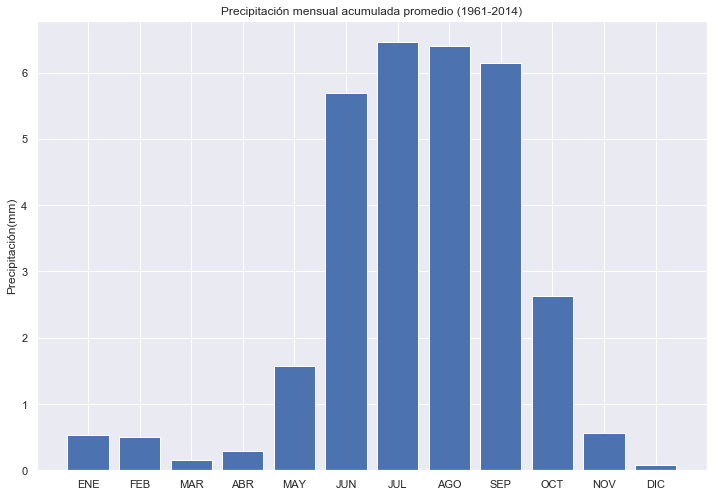

In [56]:
x = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC') 
y=np.arange(len(x))
PRECIP= [PRECIP_ENE,PRECIP_FEB,PRECIP_MAR,PRECIP_ABR,PRECIP_MAY,PRECIP_JUN,PRECIP_JUL,PRECIP_AGO,PRECIP_SEP,PRECIP_OCT,PRECIP_NOV,PRECIP_DIC]
 
plt.bar(y, PRECIP, align='center')
plt.xticks(y, x)
plt.ylabel('Precipitación(mm)')
plt.title('Precipitación mensual acumulada promedio (1961-2014)')
plt.savefig('Precip_men',plt=2000)
plt.show()

In [57]:
TMAX_ENE=df_ENE.TMAX.mean()
print("ENE = ",TMAX_ENE)

TMAX_FEB=df_FEB.TMAX.mean()
print("FEB = ",TMAX_FEB)

TMAX_MAR=df_MAR.TMAX.mean()
print("MAR = ",TMAX_MAR)

TMAX_ABR=df_ABR.TMAX.mean()
print("ABR = ",TMAX_ABR)

TMAX_MAY=df_MAY.TMAX.mean()
print("MAY = ",TMAX_MAY)

TMAX_JUN=df_JUN.TMAX.mean()
print("JUN = ",TMAX_JUN)

TMAX_JUL=df_JUL.TMAX.mean()
print("JUL = ",TMAX_JUL)

TMAX_AGO=df_AGO.TMAX.mean()
print("AGO = ",TMAX_AGO)

TMAX_SEP=df_SEP.TMAX.mean()
print("SEP = ",TMAX_SEP)

TMAX_OCT=df_OCT.TMAX.mean()
print("OCT = ",TMAX_OCT)

TMAX_NOV=df_NOV.TMAX.mean()
print("NOV = ",TMAX_NOV)

TMAX_DIC=df_DIC.TMAX.mean()
print("DIC = ",TMAX_DIC)

ENE =  23.56646525679758
FEB =  25.29450726978998
MAR =  27.463289280469898
ABR =  29.295487627365357
MAY =  28.922402159244264
JUN =  25.639082058414466
JUL =  23.59620786516854
AGO =  23.51121351766513
SEP =  23.106326889279437
OCT =  23.474551971326164
NOV =  24.124080882352942
DIC =  23.3659793814433


In [58]:
TMIN_ENE=df_ENE.TMIN.mean()
print("ENE = ",TMIN_ENE)

TMIN_FEB=df_FEB.TMIN.mean()
print("FEB = ",TMIN_FEB)

TMIN_MAR=df_MAR.TMIN.mean()
print("MAR = ",TMIN_MAR)

TMIN_ABR=df_ABR.TMIN.mean()
print("ABR = ",TMIN_ABR)

TMIN_MAY=df_MAY.TMIN.mean()
print("MAY = ",TMIN_MAY)

TMIN_JUN=df_JUN.TMIN.mean()
print("JUN = ",TMIN_JUN)

TMIN_JUL=df_JUL.TMIN.mean()
print("JUL = ",TMIN_JUL)

TMIN_AGO=df_AGO.TMIN.mean()
print("AGO = ",TMIN_AGO)

TMIN_SEP=df_SEP.TMIN.mean()
print("SEP = ",TMIN_SEP)

TMIN_OCT=df_OCT.TMIN.mean()
print("OCT = ",TMIN_OCT)

TMIN_NOV=df_NOV.TMIN.mean()
print("NOV = ",TMIN_NOV)

TMIN_DIC=df_DIC.TMIN.mean()
print("DIC = ",TMIN_DIC)

ENE =  7.789879154078549
FEB =  8.311290322580644
MAR =  9.577092511013216
ABR =  11.510595065312046
MAY =  13.610767160161506
JUN =  14.383053221288515
JUL =  13.73806179775281
AGO =  13.684024577572963
SEP =  13.71298245614035
OCT =  12.433870967741937
NOV =  10.05669724770642
DIC =  8.156810035842295


In [59]:
init = 1961
AÑOS = [init + i for i in range(0, 54)]
PAÑO = [ df[df.AÑO==(init + i)].PRECIP.sum() for i in range(0, 54)]

In [60]:
d = {'AÑO': AÑOS, 'PRECIPITACIÓN_TOTAL': PAÑO}
df2 = pd.DataFrame(data=d)
df2.head()

,AÑO,PRECIPITACIÓN_TOTAL
0,1961,918.0
1,1962,1017.7
2,1963,343.4
3,1964,17.9
4,1965,948.1


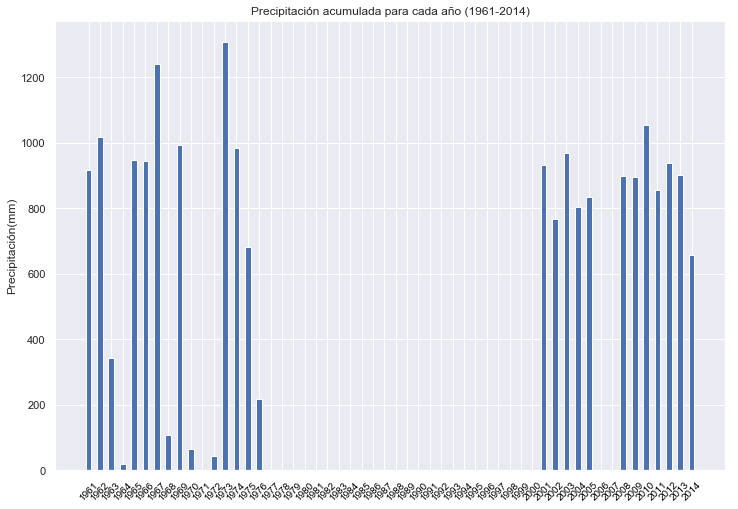

In [61]:
fecha = AÑOS
N = np.arange(len(fecha))
PRECIPIT= PAÑO
 
plt.bar(N, PRECIPIT,  width=0.5,align='center')
plt.xticks(N, fecha, size = 'small', color = 'black', rotation = 45)
plt.ylabel('Precipitación(mm)')
plt.title('Precipitación acumulada para cada año (1961-2014)')
plt.savefig('Precip_anu',plt=2000)
plt.show()

In [62]:
PRECIP_ENE=df_ENE.PRECIP.mean()
print("ENE = ",PRECIP_ENE)

PRECIP_FEB=df_FEB.PRECIP.mean()
print("FEB = ",PRECIP_FEB)

PRECIP_MAR=df_MAR.PRECIP.mean()
print("MAR = ",PRECIP_MAR)

PRECIP_ABR=df_ABR.PRECIP.mean()
print("ABR = ",PRECIP_ABR)

PRECIP_MAY=df_MAY.PRECIP.mean()
print("MAY = ",PRECIP_MAY)

PRECIP_JUN=df_JUN.PRECIP.mean()
print("JUN = ",PRECIP_JUN)

PRECIP_JUL=df_JUL.PRECIP.mean()
print("JUL = ",PRECIP_JUL)

PRECIP_AGO=df_AGO.PRECIP.mean()
print("AGO = ",PRECIP_AGO)

PRECIP_SEP=df_SEP.PRECIP.mean()
print("SEP = ",PRECIP_SEP)

PRECIP_OCT=df_OCT.PRECIP.mean()
print("OCT = ",PRECIP_OCT)

PRECIP_NOV=df_NOV.PRECIP.mean()
print("NOV = ",PRECIP_NOV)

PRECIP_DIC=df_DIC.PRECIP.mean()
print("DIC = ",PRECIP_DIC)

ENE =  0.5330316742081448
FEB =  0.49967689822294026
MAR =  0.1562408223201175
ABR =  0.2898550724637682
MAY =  1.5741935483870966
JUN =  5.690416666666668
JUL =  6.461009817671813
AGO =  6.403840245775732
SEP =  6.150877192982458
OCT =  2.628136200716846
NOV =  0.5598526703499079
DIC =  0.07255574614065181


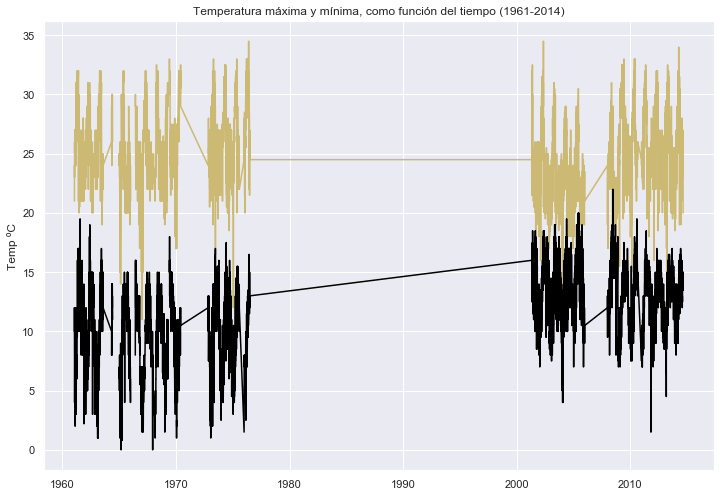

In [83]:
plt.plot_date(x=df.FECHA, y=df.TMAX, fmt="y")
plt.plot_date(x=df.FECHA, y=df.TMIN, fmt="BLACK")
plt.title("Temperatura máxima y mínima, como función del tiempo (1961-2014)")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.savefig('Temp_maxymin',plt=2000)
plt.show()

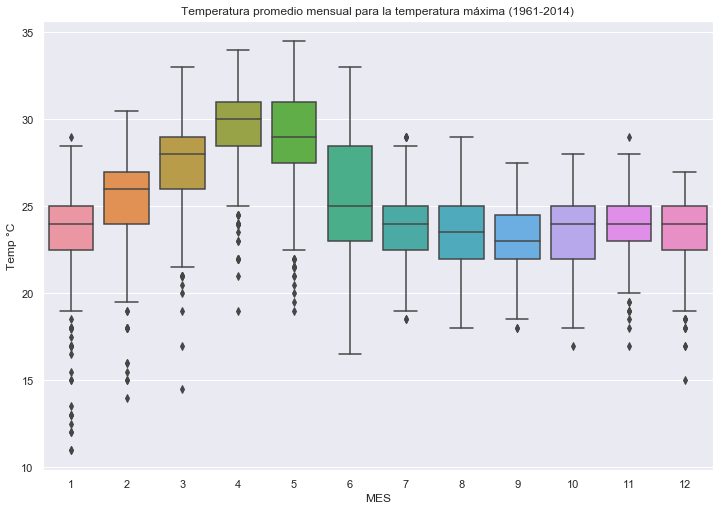

In [64]:
ax = sns.boxplot(x="MES", y="TMAX", data=df)
plt.title("Temperatura promedio mensual para la temperatura máxima (1961-2014)")
plt.ylabel ("Temp °C")
plt.savefig('Temp_prommenmax',plt=2000)

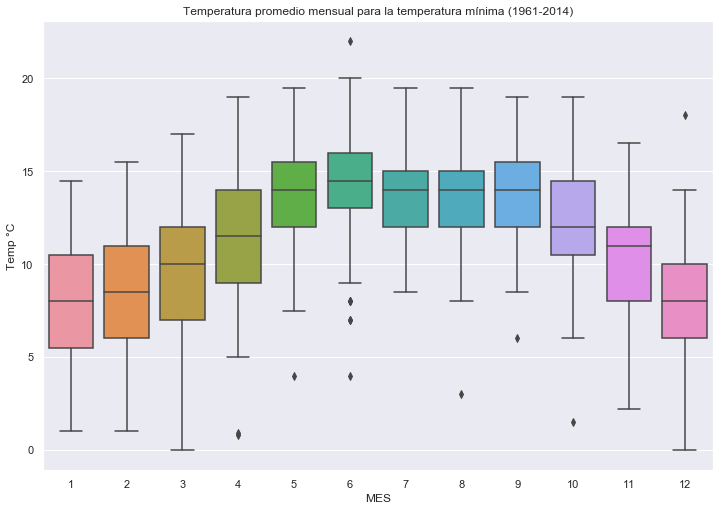

In [65]:
ax = sns.boxplot(x="MES", y="TMIN", data=df)
plt.title("Temperatura promedio mensual para la temperatura mínima (1961-2014)")
plt.ylabel ("Temp °C")
plt.savefig('Temp_prommenmin',plt=2000)

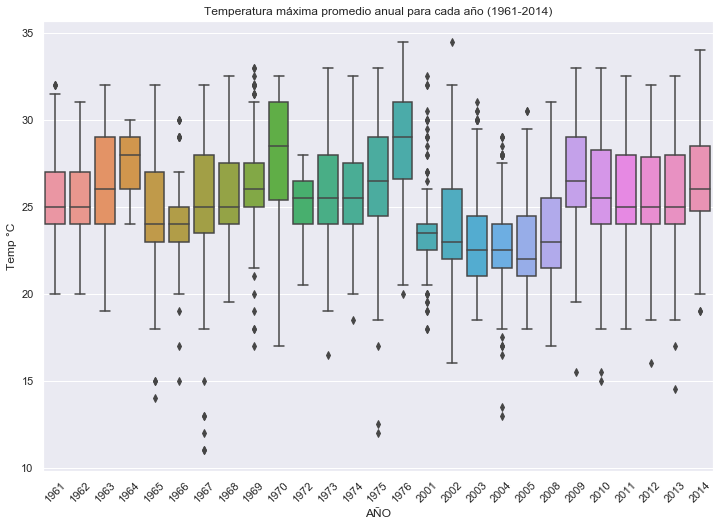

In [66]:
ax = sns.boxplot(x="AÑO", y="TMAX", data=df)
plt.xticks(rotation=45)
plt.title("Temperatura máxima promedio anual para cada año (1961-2014)")
plt.ylabel ("Temp °C")
plt.savefig('Temp_promanumax',plt=2000)

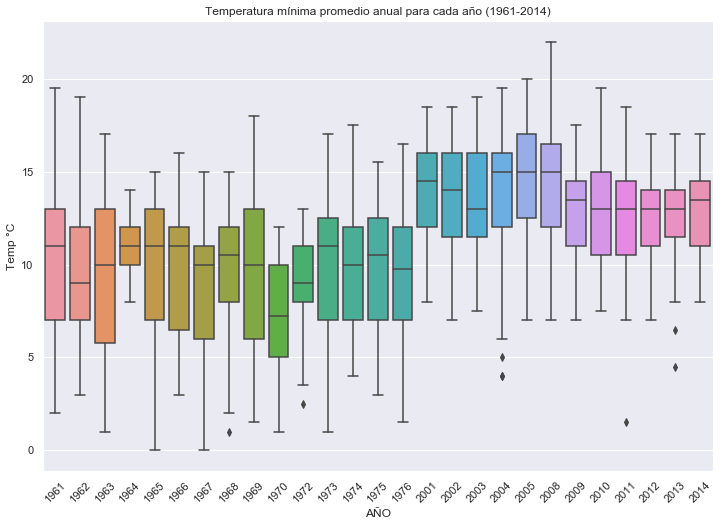

In [67]:
ax = sns.boxplot(x="AÑO", y="TMIN", data=df)
plt.xticks(rotation=45)
plt.title("Temperatura mínima promedio anual para cada año (1961-2014)")
plt.ylabel ("Temp °C")
plt.savefig('Temp_promanumin',plt=2000)